# Cliff Walking - Intro

Cliff Walking environment consists of a rectangular area of 4 x 12 squares, in which an agent (the element that interacts with this environment) starts in the bottom left corner, and its goal is to reach the bottom right corner. Sounds pretty simple so far, right? Not so quick.

Here is the catch. 

Bottom row, except for the starting position and terminal (final goal) position, is defined as a cliff. Every time the agent tries to move to one of this squares it gets a very negative reward (-100) and the environment puts the agent back in its starting corner. You die when going over the cliff and your life starts again, from the same position.

#### Hey, that's a toy environment so it works there, but don't try this in real life!

## Step 1 - Import all you need

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import gym
import random
import itertools
import sys
from collections import defaultdict
from gym.envs.toy_text.cliffwalking import CliffWalkingEnv

matplotlib.style.use('ggplot')
%matplotlib inline

## Step 2 - Verify that you got the environment and can work with it

In [20]:
# Create the Cliffwalking environment
env = gym.make('CliffWalking-v0')
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



## Step 3 - Test-drive the environment

In [21]:
action = ["up", "right", "down", "left"]


# 4x12 grid = 48 states
print("Number of states:", env.nS)


# left, up, down or right
print("\nNumber of actions an agent can take:", env.nA)


# Current state - "x" state
print("\nCurrent state:", env.s)


# Where can I go from here -> 4 action
print("\nTransitions from current state:", env.P[env.s])

Number of states: 48

Number of actions an agent can take: 4

Current state: 36

Transitions from current state: {0: [(1.0, 24, -1, False)], 1: [(1.0, 36, -100, False)], 2: [(1.0, 36, -1, False)], 3: [(1.0, 36, -1, False)]}


## Step 4 - Define your own render() function

In [22]:
def plot_custom_grid(full_grid, current_position):
    colors = {'C': 'black', '': 'yellow', 'X': 'navy'}

    # Map string values to numeric values
    numeric_grid = np.zeros_like(full_grid, dtype=float)
    for key, value in colors.items():
        numeric_grid[full_grid == key] = 1 if key == 'C' else 0  # Set to 1 for 'C', 0 for '' and 'X'

    fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the size as needed

    # Plotting each cell individually to control borders
    for i in range(full_grid.shape[0]):
        for j in range(full_grid.shape[1]):
            value = full_grid[i, j]
            color = colors.get(value, 'white')  # Default to white if the value is not recognized

            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            ax.text(j, i, value, ha='center', va='center', fontsize=12, color='black' if color == 'white' else 'white')

    ax.set_xlim([-0.5, full_grid.shape[1] - 0.5])
    ax.set_ylim([-0.5, full_grid.shape[0] - 0.5])

    ax.set_xticks(np.arange(full_grid.shape[1]))
    ax.set_yticks(np.arange(full_grid.shape[0]))

    ax.tick_params(axis='both', which='both', length=0)  # Hide tick marks
    ax.xaxis.set_ticks_position('bottom')  # Show ticks on the bottom axis
    ax.yaxis.set_ticks_position('left')    # Show ticks on the left axis

    plt.grid(True, color='black', linewidth=2)  # Add grid lines
    plt.show()

## Step 5 - Display your environment in a nicer and cleaner way

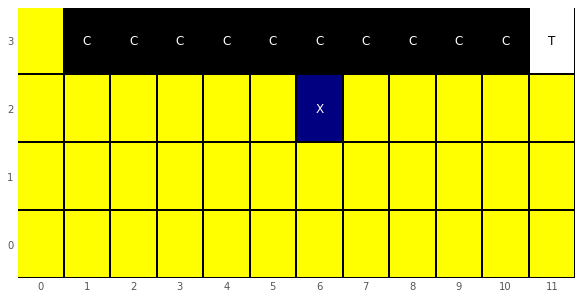

In [23]:
# Example how to use
full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
current_position = (2, 6)  # Example current position (row, column)

# Mark the current position with 'X'
full_grid[current_position] = 'X'

# Plot the custom grid with reversed rows
plot_custom_grid(full_grid, current_position)

## Step 6 - How would it look like to take consecutive steps?


Current state: 36

Action taken: right

Transition probability: {'prob': 1.0}

Next state: 36

Reward received: -100

Terminal state: False

Position (3, 0)


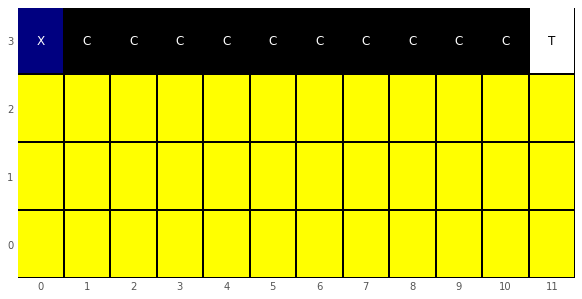

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


Current state: 36

Action taken: up

Position (2, 0)


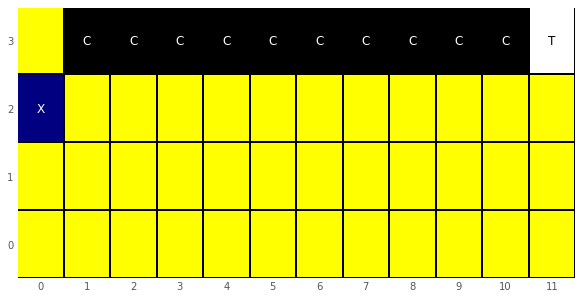

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


Current state: 24

Action taken: down

Position (3, 0)


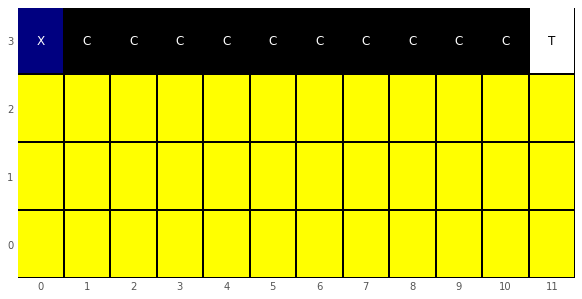

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


Current state: 36

Action taken: left

Position (3, 0)


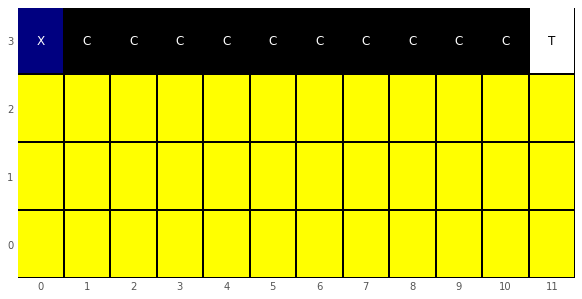

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


Current state: 36

Action taken: down

Position (3, 0)


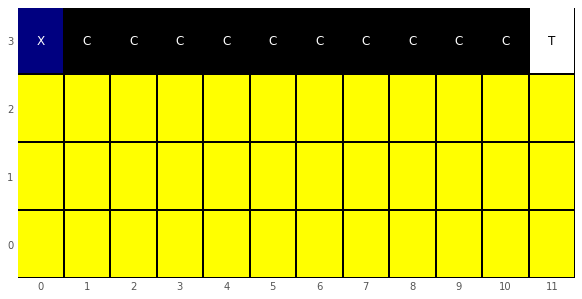

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


Current state: 36

Action taken: right

Position (3, 0)


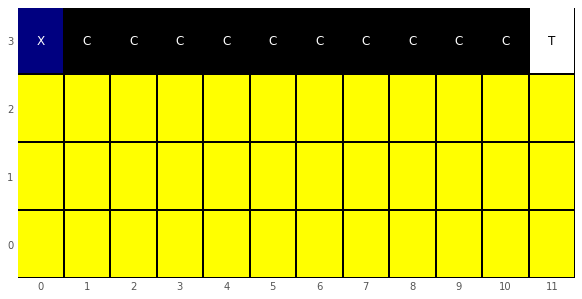

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


Current state: 36

Action taken: up

Position (2, 0)


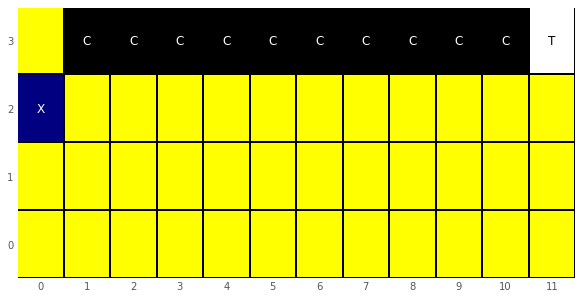

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


Current state: 24

Action taken: up

Position (1, 0)


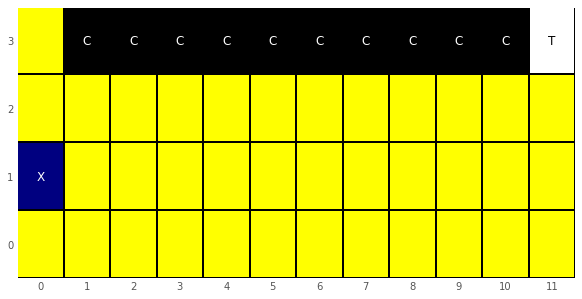

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


Current state: 12

Action taken: right

Position (1, 1)


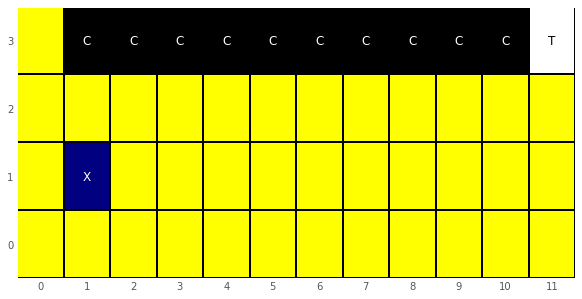

o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [24]:
# CHECK WHERE I AM AND TAKE ACTION 1
print("\nCurrent state:", env.s)

# Taking a step by selecting a random action[up=0, right=1, down=2, left=3] from current state
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])

# TAKE ACTION 1
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
print ("\nTransition probability:", t_prob)
print ("\nNext state:", next_state)
print ("\nReward received:", reward)
print ("\nTerminal state:", is_terminal)

current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

# Plot the custom grid with reversed rows
plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 2
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 3
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 4
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 5
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 6
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 7
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 8
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()




# CHECK WHERE I AM AND TAKE ACTION 9
print("\nCurrent state:", env.s)
rnd_action = random.randint(0, 3)
print ("\nAction taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
current_position = np.unravel_index(next_state, (4,12))
print("\nPosition", current_position)

full_grid = np.full((4, 12), '', dtype='<U1')
full_grid[3, 1:-1] = 'C'
full_grid[3, 11] = 'T'
full_grid[current_position] = 'X'

plot_custom_grid(full_grid, current_position)
env.render()

## Step 7 - Whenever you repeat your code, you should maybe use a loop instead (!)

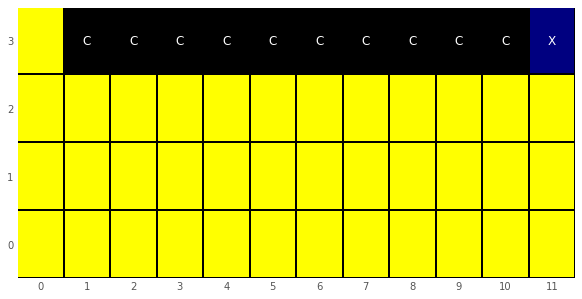

current state (labeled as next) -  47 Is Terminal State? True


In [25]:
import time
from IPython.display import clear_output

env.reset()
actions = [0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]
for i in range(len(actions)):
    print("Step Nr.:", i+1, "| Current state:", env.s)
    action = actions[i]
    next_state, reward, is_terminal, t_prob = env.step(action)
    current_position = np.unravel_index(next_state, env.shape)
    print("\nAction taken:", action, "Current Position", current_position)
    
    full_grid = np.full(env.shape, '', dtype='<U1')
    full_grid[3, 1:-1] = 'C'
    full_grid[3, 11] = 'T'
    full_grid[current_position] = 'X'

    plot_custom_grid(full_grid, current_position)
    plt.pause(2)  # Pause for 2 seconds
    clear_output(wait=True)  # Clear the previous output

# Plot final grid and display return values    
plot_custom_grid(full_grid, current_position)    
print("current state (labeled as next) - ", next_state, "Is Terminal State?", is_terminal)

## Isn't that much more clear ?!